<a href="https://colab.research.google.com/github/MarkovMarkowitz/MarkovMarkowitzV2/blob/MarkovMarkowitz-patch-1/ON11_HMM_Regime_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

# Download historical stock price data
tuprs = yf.download('TUPRS.IS', start='2018-01-01', end='2024-02-29')
kozal = yf.download('KOZAL.IS', start='2018-01-01', end='2024-02-29')
gubrf = yf.download('GUBRF.IS', start='2018-01-01', end='2024-02-29')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


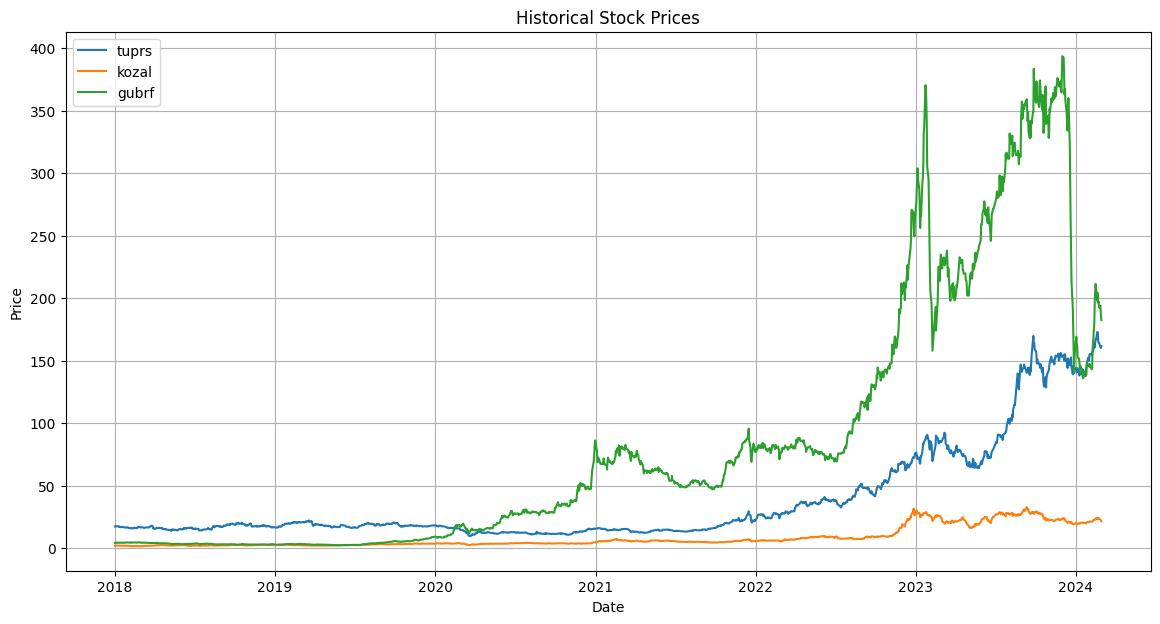

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(tuprs['Close'], label='tuprs')
plt.plot(kozal['Close'], label='kozal')
plt.plot(gubrf['Close'], label='gubrf')
plt.title('Historical Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.show()

In [ ]:
tuprs['Return'] = tuprs['Close'].pct_change()
kozal['Return'] = kozal['Close'].pct_change()
gubrf['Return'] = gubrf['Close'].pct_change()

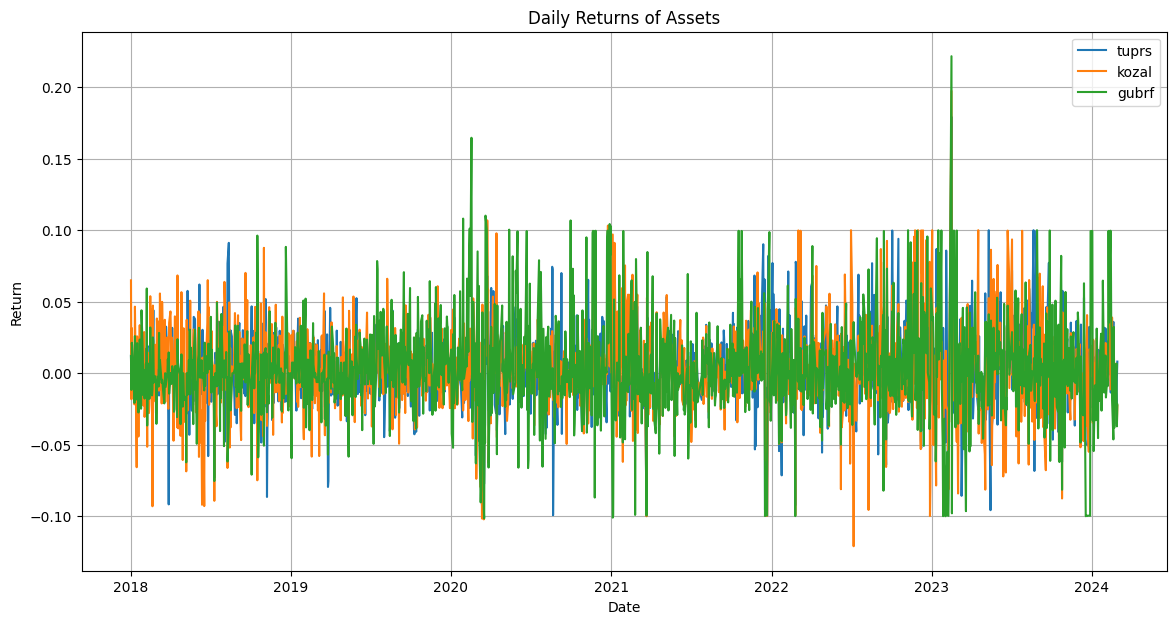

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(tuprs['Return'], label='tuprs')
plt.plot(kozal['Return'], label='kozal')
plt.plot(gubrf['Return'], label='gubrf')
plt.title('Daily Returns of Assets')
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend()
plt.grid(True)

plt.show()

In [ ]:
!pip install hmmlearn

In [ ]:
from hmmlearn.hmm import GaussianHMM

# Align the lengths of returns for stacking
min_length = min(len(tuprs['Return'].dropna()), len(kozal['Return'].dropna()), len(gubrf['Return'].dropna()))

data = np.column_stack([tuprs['Return'].dropna().values[:min_length], kozal['Return'].dropna().values[:min_length], gubrf['Return'].dropna().values[:min_length]])

# Fit the Hidden Markov Model
model = GaussianHMM(n_components=3, covariance_type="full", n_iter=1000)
model.fit(data)

GaussianHMM(covariance_type='full', n_components=3, n_iter=1000)

In [ ]:
hidden_states = model.predict(data)

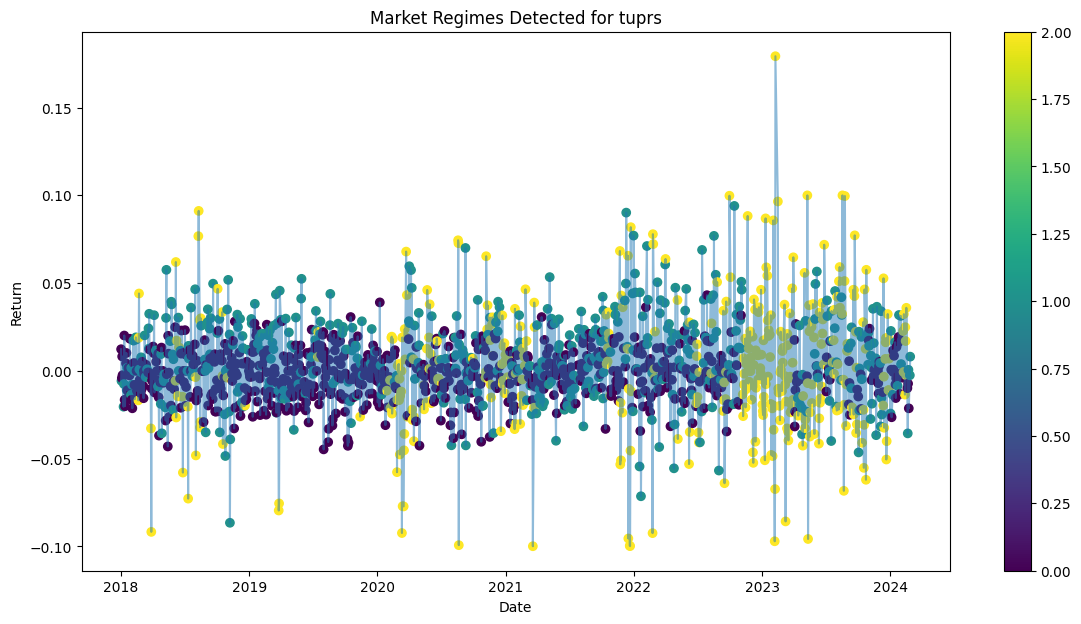

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(tuprs.index[:min_length], tuprs['Return'].dropna().values[:min_length], label='tuprs Returns', alpha=0.5)
plt.scatter(tuprs.index[:min_length], tuprs['Return'].dropna().values[:min_length], c=hidden_states, cmap='viridis')
plt.title('Market Regimes Detected for tuprs')
plt.xlabel('Date')
plt.ylabel('Return')
plt.colorbar()

plt.show()

In [ ]:
hidden_states

array([0, 1, 0, ..., 0, 1, 1])

In [ ]:
np.shape(hidden_states)

(1564,)